<a href="https://colab.research.google.com/github/FeiQ17/feiqin/blob/master/Data_Scraping_and_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Scraping and Analysis with Python

<p align="center"><font size=4>Link to Workshop Home Page - 
<a href="https://guides.lib.purdue.edu/d-velop"> https://guides.lib.purdue.edu/d-velop </a></font></p>

<p align="center">
<img src='https://drive.google.com/uc?export=view&id=10EJ2NtrseXHNLivSytojr-7meEUer9s1' width="600px"/>


</p>

All workshops are recorded and the videos and material can be found on the workshop home page.

> Link to Fall 2021 workshops - <a href="https://guides.lib.purdue.edu/d-velop/2021-ml">https://guides.lib.purdue.edu/d-velop/2021-ml</a>

> Introduction to Python - https://guides.lib.purdue.edu/d-velop/ml-workshop/intro-to-python

> Machine Learning Overview - https://guides.lib.purdue.edu/d-velop/ml-workshop/overview

> Intro to Neural Networks - https://guides.lib.purdue.edu/d-velop/ml-dl/intro-nn


#Workshop Schedule

|<font size="4">Topics</font>|<font size="4">Date</font>|<font size="4">Time</font>|
|:--:|:--:|:--:|
|<font size="4">Data Scraping and Analysis with Python</font>|<font size="4">09/07/Wednesday</font>|<font size="4">1:00 - 2:30pm</font>|
|<font size="4">Introduction to Nueral Network</font>|<font size="4">09/14/Wednesday</font>|<font size="4">1:00 - 2:30pm</font>|
|<font size="4">Introduction to Web API and Database</font>|<font size="4">09/26/Monday</font>|<font size="4">1:00 - 2:30pm</font>|
|<font size="4">Introduction to Transformers in Image Processing</font>|<font size="4">10/03/Monday</font>|<font size="4">1:00 - 2:30pm</font>|

#Today's Lecture
1. HTML pages
2. Chrome DevTools
3. BeautifulSoup
4. Data Anaysis
  * Dataset Creation
  * Dataset Cleaning
  * Dataset Analysis
5. Advanced Usage of Dataset


# Setup Imports

>One of the main goal in web scraping is to gather data from the web and convert its html structured format into another format like tabular data which can be used to perfrom data analysis.

>This could involve simply reading tables out of a webpage all the way up to taking irregularly-structured HTML elements into a tabular format. 

We will use the [`pandas`](https://pandas.pydata.org/) library ("**panel** **data**"), which is Python's implementation of a data frame concept. This is a very powerful and complex library that helps with dealing with data as a structured format and has plenty of useful methods we will use in this notebook. 

Let's begin by importing the libraries we'll need in this notebook: **requests, BeautifulSoup, and pandas**

Beautiful Soup documentation - https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [ ]:
import requests

# We import pandas with alias pd
import pandas as pd
import numpy as np

# BeautifulSoup is a module inside the "bs4" library, we only import the BeautifulSoup module and give it an alias "soup"
from bs4 import BeautifulSoup as soup





##HTML (Hyper Text Markup Language)

### HTML page structure

**Hypertext Markup Language (HTML)** is the standard markup language for documents designed to be displayed in a web browser. HTML describes the structure of a web page and it can be used with **Cascading Style Sheets (CSS)** and a scripting language such as **JavaScript** to create interactive websites. HTML consists of a series of elements that "tell" to the browser how to display the content. Lastly, elements are represented by **tags**.

Here are some tags:
* `<!DOCTYPE html>` declaration defines this document to be HTML5.  
* `<html>` element is the root element of an HTML page.  
* `<div>` tag defines a division or a section in an HTML document. It's usually a container for other elements.
* `<head>` element contains meta information about the document.  
* `<title>` element specifies a title for the document.  
* `<body>` element contains the visible page content.  
* `<h1>` element defines a large heading.  
* `<p>` element defines a paragraph.  
* `<a>` element defines a hyperlink.

HTML tags normally come in pairs like `<p>` and `</p>`. The first tag in a pair is the opening tag, the second tag is the closing tag. The end tag is written like the start tag, but with a slash inserted before the tag name.

<img src="https://raw.githubusercontent.com/nestauk/im-tutorials/3-ysi-tutorial/figures/Web-Scraping/tags.png" width="512">

HTML has a tree-like 🌳 🌲 structure thanks to the **Document Object Model (DOM)**, a cross-platform and language-independent interface. Here's how a very simple HTML tree looks like.

<img src="https://raw.githubusercontent.com/nestauk/im-tutorials/3-ysi-tutorial/figures/Web-Scraping/dom_tree.gif">


##Inspect Tool - **Chrome DevTools**

[Chrome DevTools](https://developers.google.com/web/tools/chrome-devtools/) is a set of web developer tools built directly into the Google Chrome browser. DevTools can help you view and edit web pages. We will use Chrome's tool to inspect an HTML page and find which elements correspond to the data we might want to scrape.

## Short exercise
To get some experience with the HTML page structure and Chrome DevTools, we will search and locate elements in [IMDB](https://www.imdb.com/). 

**Tip**: Hit *Command+Option+C* (Mac) or *Control+Shift+C* (Windows, Linux) to access the elements panel.

# Web Scraping with `requests` and `BeautifulSoup`

We will use `requests` and `BeautifulSoup` to access and scrape the content of [IMDB's homepage](https://www.imdb.com).

## What is `BeautifulSoup`?

It is a Python library for pulling data out of HTML and XML files. It provides methods to navigate the document's tree structure that we discussed before and scrape its content.

## Our pipeline
<img src='https://github.com/nestauk/im-tutorials/blob/3-ysi-tutorial/figures/Web-Scraping/scrape-pipeline.png?raw=1' width="1024">

In [ ]:
# Imports
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
#import matplotlib.pyplot as plt

#%matplotlib inline

In [ ]:
# IMDB's homepage
imdb_url = 'https://www.imdb.com/chart/top'

# Use requests to retrieve data from a given URL
imdb_response = requests.get(imdb_url)

# Parse the whole HTML page using BeautifulSoup
imdb_soup = BeautifulSoup(imdb_response.text, 'html.parser')

# Title of the parsed page
imdb_soup.title

<title>Top 250 Movies - IMDb</title>

In [ ]:
# We can also get it without the HTML tags
imdb_soup.title.string

'Top 250 Movies - IMDb'

### Collect trailers' title and description

In [ ]:
trailers = imdb_soup.find('tbody', {'class': 'lister-list'})

In [ ]:
print(trailers.prettify())

<tbody class="lister-list">
 <tr>
  <td class="posterColumn">
   <span data-value="1" name="rk">
   </span>
   <span data-value="9.234842687519922" name="ir">
   </span>
   <span data-value="7.791552E11" name="us">
   </span>
   <span data-value="2636951" name="nv">
   </span>
   <span data-value="-1.7651573124800777" name="ur">
   </span>
   <a href="/title/tt0111161/">
    <img alt="刺激1995" height="67" src="https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UY67_CR0,0,45,67_AL_.jpg" width="45"/>
   </a>
  </td>
  <td class="titleColumn">
   1.
   <a href="/title/tt0111161/" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">
    刺激1995
   </a>
   <span class="secondaryInfo">
    (1994)
   </span>
  </td>
  <td class="ratingColumn imdbRating">
   <strong title="9.2 based on 2,636,951 user ratings">
    9.2
   </strong>
  </td>
  <td class="ratingColumn">
   <div class="seen-widget seen-widget-tt0111161 pendi

We will use the `.find_all()` method to search the HTML tree for particular tags and get a `list` with all the relevant objects.

In [ ]:
titleColumn = trailers.find_all('td', {'class': 'titleColumn'})
posterColumn = trailers.find_all('td', {'class': 'posterColumn'})
                              
for title, image in zip(titleColumn, trailers.find_all('img', src = True)):
    print(f"{title.text}: {image['src']}")
    print()


      1.
      刺激1995
(1994)
: https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UY67_CR0,0,45,67_AL_.jpg


      2.
      教父
(1972)
: https://m.media-amazon.com/images/M/MV5BM2MyNjYxNmUtYTAwNi00MTYxLWJmNWYtYzZlODY3ZTk3OTFlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY67_CR1,0,45,67_AL_.jpg


      3.
      黑暗騎士
(2008)
: https://m.media-amazon.com/images/M/MV5BMTMxNTMwODM0NF5BMl5BanBnXkFtZTcwODAyMTk2Mw@@._V1_UY67_CR0,0,45,67_AL_.jpg


      4.
      教父第二集
(1974)
: https://m.media-amazon.com/images/M/MV5BMWMwMGQzZTItY2JlNC00OWZiLWIyMDctNDk2ZDQ2YjRjMWQ0XkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY67_CR1,0,45,67_AL_.jpg


      5.
      十二怒漢
(1957)
: https://m.media-amazon.com/images/M/MV5BMWU4N2FjNzYtNTVkNC00NzQ0LTg0MjAtYTJlMjFhNGUxZDFmXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX45_CR0,0,45,67_AL_.jpg


      6.
      辛德勒的名單
(1993)
: https://m.media-amazon.com/images/M/MV5BNDE4OTMxMTctNmRhYy00NWE2LTg3YzItYTk3M2UwOTU5Njg4XkEyXkFqcGdeQXVyNjU0OTQ0OT

### Find links

In many cases, it is useful to collect the links contained in a webpage (for example, you might want to scrape them too). Here is how you can do this.

In [ ]:
# Find all links
links = [link.get('href') for link in imdb_soup.find_all('a')]

# Add homepage and keep the unique links
fixed_links = set([''.join([imdb_url, link]) for link in links if link])

In [ ]:
fixed_links

{'https://www.imdb.com/chart/top#',
 'https://www.imdb.com/chart/top/?ref_=nv_home',
 'https://www.imdb.com/chart/top/awards-central/?ref_=nv_ev_awrd',
 'https://www.imdb.com/chart/top/chart/bottom',
 'https://www.imdb.com/chart/top/chart/boxoffice',
 'https://www.imdb.com/chart/top/chart/boxoffice/?ref_=nv_ch_cht',
 'https://www.imdb.com/chart/top/chart/moviemeter',
 'https://www.imdb.com/chart/top/chart/moviemeter/?ref_=nv_mv_mpm',
 'https://www.imdb.com/chart/top/chart/top',
 'https://www.imdb.com/chart/top/chart/top-english-movies',
 'https://www.imdb.com/chart/top/chart/top/?ref_=nv_mv_250',
 'https://www.imdb.com/chart/top/chart/toptv',
 'https://www.imdb.com/chart/top/chart/toptv/?ref_=nv_tvv_250',
 'https://www.imdb.com/chart/top/chart/tvmeter',
 'https://www.imdb.com/chart/top/chart/tvmeter/?ref_=nv_tvv_mptv',
 'https://www.imdb.com/chart/top/comic-con/?ref_=nv_ev_comic',
 'https://www.imdb.com/chart/top/conditions?ref_=ft_cou',
 'https://www.imdb.com/chart/top/emmys/?ref_=nv_

### Exercise 1
* Find the IMDB logo. - (Html element `<svg>` with id `home_img`)

In [ ]:
# Get the html webpage raw text
imdb_raw = requests.get('https://www.imdb.com/').text

# Convert it to a BeauifulSoup object
imdb_soup = soup(imdb_raw, 'html.parser')

In [ ]:
imdb_soup

<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta content="width=device-width" name="viewport"/><meta charset="utf-8"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><title>IMDb: Ratings, Reviews, and Where to Watch the Best Movies &amp; TV Shows</title><meta content="IMDb is the world's most popular and authoritative source for movie, TV and celebrity content. Find ratings and reviews for the newest movie and TV shows. Get personalized recommendations, and learn where to watch across hundreds of streaming providers." data-id="main" name="description"/><meta content="IMDb" property="og:site_name"/><meta content="IMDb: Ratings, Reviews, and Where to Watch the Best Movies &amp; TV Shows" property="og:title"/><meta content="IMDb is the world's most popular and authoritative source for movie, TV and celebrity content. Find ratings and reviews for the newest movie and

#### Example - Find the IMDB logo




In [ ]:
imdb_logo = imdb_soup.find('svg', {'id': 'home_img'})
imdb_logo

<svg class="ipc-logo" height="32" id="home_img" version="1.1" viewbox="0 0 64 32" width="64" xmlns="http://www.w3.org/2000/svg"><g fill="#F5C518"><rect height="100%" rx="4" width="100%" x="0" y="0"></rect></g><g fill="#000000" fill-rule="nonzero" transform="translate(8.000000, 7.000000)"><polygon points="0 18 5 18 5 0 0 0"></polygon><path d="M15.6725178,0 L14.5534833,8.40846934 L13.8582008,3.83502426 C13.65661,2.37009263 13.4632474,1.09175121 13.278113,0 L7,0 L7,18 L11.2416347,18 L11.2580911,6.11380679 L13.0436094,18 L16.0633571,18 L17.7583653,5.8517865 L17.7707076,18 L22,18 L22,0 L15.6725178,0 Z"></path><path d="M24,18 L24,0 L31.8045586,0 C33.5693522,0 35,1.41994415 35,3.17660424 L35,14.8233958 C35,16.5777858 33.5716617,18 31.8045586,18 L24,18 Z M29.8322479,3.2395236 C29.6339219,3.13233348 29.2545158,3.08072342 28.7026524,3.08072342 L28.7026524,14.8914865 C29.4312846,14.8914865 29.8796736,14.7604764 30.0478195,14.4865461 C30.2159654,14.2165858 30.3021941,13.486105 30.3021941,12.287163

> Display the svg image using ipywidgets

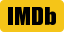

In [ ]:
from IPython.core.display import display, HTML, SVG

display(SVG(str(imdb_logo)))

# Data Source - The Box Office Mojo

[The Numbers](http://www.the-numbers.com) is a popular source of data about movies' box office revenue numbers. Their daily domestic charts are HTML tables with the top-grossing movies for each day of the year, going back for several years. This [table](https://www.the-numbers.com/box-office-chart/daily/2018/12/25) for Christmas day in 2018 has columns for the current week's ranking, previous week's ranking, name of movie, distributor, gross, change over the previous week, number of theaters, revenue per theater, total gross, and number of days since release. 

>This looks like a straightforward table that could be read directly into tabular data structure like a pandas dataframe. The overall control flow can be seen as the following:
 
<table id="box_office_daily_table" class="display compact dataTable" role="grid">

<img src='https://github.com/nestauk/im-tutorials/blob/3-ysi-tutorial/figures/Web-Scraping/boxofficemojo-pipeline.png?raw=1' width='1024'>

>Using the Inspect tool, we can see the table exists as a `<table id="box_office_daily_table" class="display compact dataTable" role="grid">` element with child tags like `<tbody>` and `<tr>` (table row). Each `<tr>` has `<td>` which defines each of the cells and their content. We also have `<thead>` which represents the header of the table. For more on how HTML defines tables, check out [this tutorial](https://www.w3schools.com/html/html_tables.asp).

Using `requests` and `BeautifulSoup` we would get this webpage's HTML, turn it into soup, and then find the table (`<table>`) or the table rows (`<tr>`) and pull out their content.

In [ ]:
# Make the request
xmas_bo_raw = requests.get('https://www.boxofficemojo.com/date/2020-12-25/').text

# Turn into soup, specify the HTML parser
xmas_bo_soup = soup(xmas_bo_raw,'html.parser')

# Use .find_all to retrieve all the tables in the page
xmas_bo_tables = xmas_bo_soup.find('div', {'id': 'table'})

In [ ]:
len(xmas_bo_tables)

1

### `pandas`'s `read_html`

> `pandas` has a powerful functionality for reading tables directly from HTML. If we convert the soup of the first table (`xmas_bo_tables[1]`) back into a string, `pandas` can read it directly into a table. 

In [ ]:
xmas_bo_table_as_string = str(xmas_bo_tables)
pd.read_html(xmas_bo_table_as_string)[0].head()

TD YD                Release       Daily   %± YD   %± LW  Theaters     Avg  \
0   1  -      Wonder Woman 1984  $7,482,427       -       -      2151  $3,478   
1   2  -      News of the World  $1,000,325       -       -      1900    $526   
2   3  1  The Croods: A New Age    $527,990  +51.6%   -3.5%      1726    $305   
3   4  2         Monster Hunter    $354,035  +82.8%  -57.1%      1817    $194   
4   5  -  Promising Young Woman    $256,800       -       -      1310    $196   

       To Date  Days         Distributor  New This Day  Estimated  
0   $7,482,427     1        Warner Bros.          True      False  
1   $1,000,325     1  Universal Pictures          True      False  
2  $29,144,730    31  Universal Pictures         False      False  
3   $3,446,452     8         Screen Gems         False      False  
4     $256,800     1      Focus Features          True      False

In [ ]:
artists = pd.read_html('https://en.wikipedia.org/wiki/List_of_best-selling_music_artists')

> Another example of using  Wikipedia's [2018 in film](https://en.wikipedia.org/wiki/2018_in_film), it will pull all of the tables present on the page.

In [ ]:
wiki_top_grossing_t = pd.read_html('https://en.wikipedia.org/wiki/2018_in_film')[5]
wiki_top_grossing_t

Date                                     Event  \
0            January 18–28               2018 Sundance Film Festival   
1           February 15–25   68th Berlin International Film Festival   
2                 May 8–19                 2018 Cannes Film Festival   
3  August 29 – September 8   75th Venice International Film Festival   
4           September 6–16  2018 Toronto International Film Festival   

                                  Host                        Location  Source  
0                   Sundance Institute  Park City, Utah, United States     NaN  
1   Berlin International Film Festival                 Berlin, Germany     NaN  
2                 Cannes Film Festival                  Cannes, France     NaN  
3                 Venice Film Festival                   Venice, Italy     NaN  
4  Toronto International Film Festival        Toronto, Ontario, Canada     NaN

## Creating a dataset for box office numbers for the Dec 2020

Let's get the box office numbers for the entire month of december in 2020

In [ ]:
from time import sleep

The `sleep(3)` below prevents any more code from progressing for 3 seconds.

In [ ]:
print("The start of something.")
sleep(3)
print("The end of something.")

The start of something.
The end of something.


The core part of the iterating strategy is simply using Python's [`range`](https://docs.python.org/3.7/library/functions.html#func-range) function to generate a sequence of values. Here, we can use `range` to print out a sequence of URLs that should correspond to box office numbers from Dec 1 2018 through Dec 31 2018. We can also incorporate the `sleep` functionality and wait a second between each `print` statement—it should now take 10 seconds for this code to finish printing. This simulates how we can use `sleep` to slow down and spread out requests so that we do not overwhelm the servers whose data we are trying to scrape.

In [ ]:
for day in range(0, 31):
  sleep(1)
  print('https://www.boxofficemojo.com/date/2020-12-{}/'.format(day))

https://www.boxofficemojo.com/date/2020-12-0/
https://www.boxofficemojo.com/date/2020-12-1/
https://www.boxofficemojo.com/date/2020-12-2/
https://www.boxofficemojo.com/date/2020-12-3/
https://www.boxofficemojo.com/date/2020-12-4/
https://www.boxofficemojo.com/date/2020-12-5/
https://www.boxofficemojo.com/date/2020-12-6/
https://www.boxofficemojo.com/date/2020-12-7/
https://www.boxofficemojo.com/date/2020-12-8/
https://www.boxofficemojo.com/date/2020-12-9/
https://www.boxofficemojo.com/date/2020-12-10/
https://www.boxofficemojo.com/date/2020-12-11/
https://www.boxofficemojo.com/date/2020-12-12/
https://www.boxofficemojo.com/date/2020-12-13/
https://www.boxofficemojo.com/date/2020-12-14/
https://www.boxofficemojo.com/date/2020-12-15/
https://www.boxofficemojo.com/date/2020-12-16/
https://www.boxofficemojo.com/date/2020-12-17/
https://www.boxofficemojo.com/date/2020-12-18/
https://www.boxofficemojo.com/date/2020-12-19/
https://www.boxofficemojo.com/date/2020-12-20/
https://www.boxofficemo

In [ ]:
bo_2020_12 = dict()
for day in range(1, 31):
  sleep(1)
  # Make the request
  xmas_bo_raw = requests.get('https://www.boxofficemojo.com/date/2020-12-{}/'.format(day)).text
  # Turn into soup, specify the HTML parser
  xmas_bo_soup = soup(xmas_bo_raw,'html.parser')
  # Use .find_all to retrieve all the tables in the page
  xmas_bo_tables = xmas_bo_soup.find_all('table')
  xmas_bo_table_as_string = str(xmas_bo_tables[0])
  df = pd.read_html(xmas_bo_table_as_string)[0]
  df['day'] = day
  bo_2020_12[day] = df

In [ ]:
bo_2020_12[2]

TD  YD                            Release     Daily    %± YD      %± LW  \
0    1   1              The Croods: A New Age  $332,730   -76.8%     -73.2%   
1    2   3                             Freaky   $60,235   +55.3%        +4%   
2    3   3                         Let Him Go   $24,130   -33.2%     -64.3%   
3    4   4               The War with Grandpa   $23,114   -29.1%     -75.2%   
4    5  11                          Come Play   $21,550   -47.5%     +51.2%   
5    6  15                       Honest Thief   $21,268    +7.6%    +111.8%   
6    7   7                              Tenet   $20,416      +4%     -55.4%   
7    8   9                           Vanguard   $12,082   -29.5%     -55.5%   
8    9  11                   The Last Vermeer   $11,665  +135.7%       -40%   
9   10  11                        Buddy Games    $8,760   -10.1%     -51.1%   
10  11  10               The Forgotten Carols    $7,452   -10.5%       -33%   
11  12  13                      The Empty Man      $762    -4.2%     +11.2%   
12  13  16                           Stardust      $570   +23.6%     -34.4%   
13  14  15                    The New Mutants      $524   +12.7%  +1,771.4%   
14  15   -                          Come Away      $456        -     -39.6%   
15  16  17                          Last Call      $265   -36.1%     +12.8%   
16  17  14                          Embattled      $234   -61.3%     -63.3%   
17  18  18                           2 Hearts      $167   -20.5%     -48.1%   
18  19  19                  After We Collided      $100  +104.1%     -47.9%   
19  20  25  Pray: The Story of Patrick Peyton       $20   -61.5%      +100%   

    Theaters   Avg      To Date  Days               Distributor  New This Day  \
0       2211  $150  $15,559,575    19        Universal Pictures         False   
1       2057   $29   $7,223,395    28        Universal Pictures         False   
2       1907   $12   $8,790,365    27            Focus Features         False   
3       1500   $15  $17,284,199    55               101 Studios         False   
4       1029   $20   $8,725,140    46            Focus Features         False   
5        975   $21  $13,609,213    74      Open Road Films (II)         False   
6        656   $31  $57,405,093    91              Warner Bros.         False   
7        450   $26     $720,909    13         Gravitas Ventures         False   
8        896   $13     $531,492    19          TriStar Pictures         False   
9        397   $22     $351,566    13        Paramount Pictures         False   
10        63  $118     $289,124    19       Purdie Distribution         False   
11        95    $8   $2,981,031    41      20th Century Studios         False   
12        44   $12       $7,374    19                 IFC Films         False   
13        40   $13  $23,828,605   129      20th Century Studios         False   
14       264    $1     $182,749    20          Relativity Media         False   
15        16   $16       $3,909    19         K Street Pictures         False   
16        46    $5      $26,773    13                 IFC Films         False   
17        19    $8   $1,348,821    64       Freestyle Releasing         False   
18        13    $7   $2,385,553    41      Open Road Films (II)         False   
19         2   $10      $70,850    55  ArtAffects Entertainment         False   

    Estimated  day  
0       False    2  
1       False    2  
2       False    2  
3       False    2  
4       False    2  
5       False    2  
6       False    2  
7       False    2  
8       False    2  
9       False    2  
10      False    2  
11      False    2  
12      False    2  
13      False    2  
14      False    2  
15      False    2  
16      False    2  
17      False    2  
18      False    2  
19      False    2

In [ ]:
len(bo_2020_12)

30

Combine each of the DataFrames in `bo_dec_2020` into a giant DataFrame of box office numbers from Dec 1 2020 to Dec 31 2020 .

In [ ]:
bo_dec_2020 = pd.concat(bo_2020_12)

In [ ]:
bo_dec_2020 = bo_dec_2020.reset_index(drop=True)
bo_dec_2020

TD  YD                Release     Daily      %± YD    %± LW Theaters  \
0     1   1  The Croods: A New Age  $512,065     +16.3%   -75.1%     2211   
1     2   2                 Freaky   $64,250     +14.4%   -56.2%     2057   
2     3   3             Let Him Go   $36,130     +57.2%   -51.7%     1907   
3     4   8   The War with Grandpa   $32,588     -60.4%     -54%     1500   
4     5   6           Honest Thief   $25,693       +24%   -41.3%      975   
..   ..  ..                    ...       ...        ...      ...      ...   
627  12  23                  Tenet    $5,500     +77.3%    +400%      116   
628  13  13            All My Life    $3,520      -8.2%   -70.8%      133   
629  14  14             Let Him Go    $1,175      -4.5%   -86.2%       54   
630  15  14   The Forgotten Carols      $845  +3,923.8%  +704.8%       48   
631  16  22             The Rescue      $242    +1,000%   +34.4%        9   

      Avg      To Date  Days           Distributor  New This Day  Estimated  \
0    $231  $15,226,845     7    Universal Pictures         False      False   
1     $31   $7,163,160    19    Universal Pictures         False      False   
2     $18   $8,766,235    26        Focus Features         False      False   
3     $21  $17,261,085    73           101 Studios         False      False   
4     $26  $13,587,945    54  Open Road Films (II)         False      False   
..    ...          ...   ...                   ...           ...        ...   
627   $47  $58,038,164   165          Warner Bros.         False      False   
628   $26     $896,870    27    Universal Pictures         False      False   
629   $21   $9,345,990    55        Focus Features         False      False   
630   $17     $499,689    55   Purdie Distribution         False      False   
631   $26      $18,172    17          CMC Pictures         False      False   

     day  
0      1  
1      1  
2      1  
3      1  
4      1  
..   ...  
627   30  
628   30  
629   30  
630   30  
631   30  

[632 rows x 14 columns]

In [ ]:
bo_dec_2020.columns = ['Rank','Last rank','Movie', 'Gross','Change', 'LW', 'Theaters', 'Per theater', 'Total gross', 'Days','Distributor', 'New', 'Estimated', 'Dec']

In [ ]:
bo_dec_2020

Rank Last rank                  Movie     Gross     Change       LW  \
0       1         1  The Croods: A New Age  $512,065     +16.3%   -75.1%   
1       2         2                 Freaky   $64,250     +14.4%   -56.2%   
2       3         3             Let Him Go   $36,130     +57.2%   -51.7%   
3       4         8   The War with Grandpa   $32,588     -60.4%     -54%   
4       5         6           Honest Thief   $25,693       +24%   -41.3%   
..    ...       ...                    ...       ...        ...      ...   
627    12        23                  Tenet    $5,500     +77.3%    +400%   
628    13        13            All My Life    $3,520      -8.2%   -70.8%   
629    14        14             Let Him Go    $1,175      -4.5%   -86.2%   
630    15        14   The Forgotten Carols      $845  +3,923.8%  +704.8%   
631    16        22             The Rescue      $242    +1,000%   +34.4%   

    Theaters Per theater  Total gross  Days           Distributor    New  \
0       2211        $231  $15,226,845     7    Universal Pictures  False   
1       2057         $31   $7,163,160    19    Universal Pictures  False   
2       1907         $18   $8,766,235    26        Focus Features  False   
3       1500         $21  $17,261,085    73           101 Studios  False   
4        975         $26  $13,587,945    54  Open Road Films (II)  False   
..       ...         ...          ...   ...                   ...    ...   
627      116         $47  $58,038,164   165          Warner Bros.  False   
628      133         $26     $896,870    27    Universal Pictures  False   
629       54         $21   $9,345,990    55        Focus Features  False   
630       48         $17     $499,689    55   Purdie Distribution  False   
631        9         $26      $18,172    17          CMC Pictures  False   

     Estimated  Dec  
0        False    1  
1        False    1  
2        False    1  
3        False    1  
4        False    1  
..         ...  ...  
627      False   30  
628      False   30  
629      False   30  
630      False   30  
631      False   30  

[632 rows x 14 columns]

## Cleaning the dataset

Let's check if there are any missing values in our dataset

In [ ]:
bo_dec_2020.isnull().sum(axis=0)

Rank           0
Last rank      0
Movie          0
Gross          0
Change         0
LW             0
Theaters       0
Per theater    0
Total gross    0
Days           0
Distributor    0
New            0
Estimated      0
Dec            0
dtype: int64

Let's convert the string with dollar signs to numbers so we can perform numeric analysis

The columns with dollar signs are - `Gross, Per theater, Total gross`

In [ ]:
for col in ['Gross', 'Per theater', 'Total gross']:
  bo_dec_2020[col] = bo_dec_2020[col].apply(lambda x: x.strip('$'))
bo_dec_2020.head()

Rank Last rank                  Movie    Gross  Change      LW Theaters  \
0     1         1  The Croods: A New Age  512,065  +16.3%  -75.1%     2211   
1     2         2                 Freaky   64,250  +14.4%  -56.2%     2057   
2     3         3             Let Him Go   36,130  +57.2%  -51.7%     1907   
3     4         8   The War with Grandpa   32,588  -60.4%    -54%     1500   
4     5         6           Honest Thief   25,693    +24%  -41.3%      975   

  Per theater Total gross  Days           Distributor    New  Estimated  Dec  
0         231  15,226,845     7    Universal Pictures  False      False    1  
1          31   7,163,160    19    Universal Pictures  False      False    1  
2          18   8,766,235    26        Focus Features  False      False    1  
3          21  17,261,085    73           101 Studios  False      False    1  
4          26  13,587,945    54  Open Road Films (II)  False      False    1

#### To convert string numbers with commas to integers, we can do the following

In [ ]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8') 

'en_US.UTF-8'

In [ ]:
bo_dec_2020 = bo_dec_2020.replace('-', '1')

In [ ]:
for col in ['Gross', 'Per theater', 'Total gross']:
  bo_dec_2020[col] = bo_dec_2020[col].apply(lambda x: locale.atoi(x))
bo_dec_2020.head()

Rank Last rank                  Movie   Gross  Change      LW Theaters  \
0     1         1  The Croods: A New Age  512065  +16.3%  -75.1%     2211   
1     2         2                 Freaky   64250  +14.4%  -56.2%     2057   
2     3         3             Let Him Go   36130  +57.2%  -51.7%     1907   
3     4         8   The War with Grandpa   32588  -60.4%    -54%     1500   
4     5         6           Honest Thief   25693    +24%  -41.3%      975   

   Per theater  Total gross  Days           Distributor    New  Estimated  Dec  
0          231     15226845     7    Universal Pictures  False      False    1  
1           31      7163160    19    Universal Pictures  False      False    1  
2           18      8766235    26        Focus Features  False      False    1  
3           21     17261085    73           101 Studios  False      False    1  
4           26     13587945    54  Open Road Films (II)  False      False    1

In [ ]:
bo_dec_2020.dtypes

Rank            int64
Last rank      object
Movie          object
Gross           int64
Change         object
LW             object
Theaters       object
Per theater     int64
Total gross     int64
Days            int64
Distributor    object
New              bool
Estimated        bool
Dec             int64
dtype: object

In [ ]:
bo_dec_2020['Last rank'] = pd.to_numeric(bo_dec_2020['Last rank']) 

In [ ]:
bo_dec_2020.dtypes

Rank            int64
Last rank       int64
Movie          object
Gross           int64
Change         object
LW             object
Theaters       object
Per theater     int64
Total gross     int64
Days            int64
Distributor    object
New              bool
Estimated        bool
Dec             int64
dtype: object

In [ ]:
bo_dec_2020['Theaters'] = pd.to_numeric(bo_dec_2020['Theaters']) 

In [ ]:
bo_dec_2020.dtypes

Rank            int64
Last rank       int64
Movie          object
Gross           int64
Change         object
LW             object
Theaters        int64
Per theater     int64
Total gross     int64
Days            int64
Distributor    object
New              bool
Estimated        bool
Dec             int64
dtype: object

In [ ]:
bo_dec_2020['Total gross']

0      15226845
1       7163160
2       8766235
3      17261085
4      13587945
         ...   
627    58038164
628      896870
629     9345990
630      499689
631       18172
Name: Total gross, Length: 632, dtype: int64

#### Similarly lets convert the percentage values in Change and LW to numbers.

In [ ]:
bo_dec_2020['Change']

0         +16.3%
1         +14.4%
2         +57.2%
3         -60.4%
4           +24%
         ...    
627       +77.3%
628        -8.2%
629        -4.5%
630    +3,923.8%
631      +1,000%
Name: Change, Length: 632, dtype: object

In [ ]:
for col in ['Change', 'LW']:
  bo_dec_2020[col] = bo_dec_2020[col].apply(lambda x: locale.atoi(str(x).split('.')[0].strip('%+')))
bo_dec_2020.head()

Rank  Last rank                  Movie   Gross  Change  LW  Theaters  \
0     1          1  The Croods: A New Age  512065      16 -75      2211   
1     2          2                 Freaky   64250      14 -56      2057   
2     3          3             Let Him Go   36130      57 -51      1907   
3     4          8   The War with Grandpa   32588     -60 -54      1500   
4     5          6           Honest Thief   25693      24 -41       975   

   Per theater  Total gross  Days           Distributor    New  Estimated  Dec  
0          231     15226845     7    Universal Pictures  False      False    1  
1           31      7163160    19    Universal Pictures  False      False    1  
2           18      8766235    26        Focus Features  False      False    1  
3           21     17261085    73           101 Studios  False      False    1  
4           26     13587945    54  Open Road Films (II)  False      False    1

Great! we have cleaned all the important parts of the data




#### One last thing, we can convert the strings to lowercase for easier analysis.



In [ ]:
for col in ['Movie', 'Distributor']:
  bo_dec_2020[col] = bo_dec_2020[col].apply(lambda x: x.lower())
bo_dec_2020.head()

Rank  Last rank                  Movie   Gross  Change  LW  Theaters  \
0     1          1  the croods: a new age  512065      16 -75      2211   
1     2          2                 freaky   64250      14 -56      2057   
2     3          3             let him go   36130      57 -51      1907   
3     4          8   the war with grandpa   32588     -60 -54      1500   
4     5          6           honest thief   25693      24 -41       975   

   Per theater  Total gross  Days           Distributor    New  Estimated  Dec  
0          231     15226845     7    universal pictures  False      False    1  
1           31      7163160    19    universal pictures  False      False    1  
2           18      8766235    26        focus features  False      False    1  
3           21     17261085    73           101 studios  False      False    1  
4           26     13587945    54  open road films (ii)  False      False    1

## Let's analyze our dataset now

In [ ]:
bo_dec_2020.describe()

Rank   Last rank         Gross        Change           LW  \
count  632.000000  632.000000  6.320000e+02    632.000000   632.000000   
mean    11.526899   11.287975  1.019489e+05    132.799051    58.507911   
std      6.886623    7.202701  4.441080e+05    793.637230   331.383141   
min      1.000000    1.000000  8.000000e+00    -96.000000   -98.000000   
25%      6.000000    5.000000  2.997000e+03    -29.000000   -56.000000   
50%     11.000000   11.000000  1.577700e+04      2.000000   -20.000000   
75%     16.000000   16.000000  5.139100e+04     64.000000    12.000000   
max     27.000000   27.000000  7.482427e+06  17600.000000  3390.000000   

          Theaters  Per theater   Total gross        Days         Dec  
count   632.000000   632.000000  6.320000e+02  632.000000  632.000000  
mean    609.253165    88.268987  8.331850e+06   44.458861   15.183544  
std     608.586895   210.801407  1.349779e+07   43.741803    8.639891  
min       1.000000     0.000000  1.000000e+00    1.000000    1.000000  
25%      80.000000    16.000000  3.940162e+05   14.000000    7.000000  
50%     427.000000    38.000000  1.771166e+06   31.500000   15.000000  
75%     966.250000    95.000000  9.351552e+06   62.000000   23.000000  
max    2211.000000  3478.000000  5.803816e+07  372.000000   30.000000

#### Let's find all the unique movies that were in box office in the month of december 2018.

In [ ]:
unique_movies = bo_dec_2020['Movie'].unique()
unique_movies

array(['the croods: a new age', 'freaky', 'let him go',
       'the war with grandpa', 'honest thief', 'come play', 'tenet',
       'the last vermeer', 'vanguard', 'the forgotten carols',
       'buddy games', 'the climb', 'the empty man', 'embattled',
       'the new mutants', 'stardust', 'last call', '2 hearts',
       'after we collided', 'come away',
       'pray: the story of patrick peyton', 'half brothers',
       'all my life', 'elf2020 re-release', 'die hard2020 re-release',
       "national lampoon's christmas vacation2020 re-release",
       'the polar express2020 re-release', 'true to the game 2',
       'the grinch2020 re-release',
       'the godfather part iii2020 re-release', 'frozen2020 re-release',
       'wonder woman2020 re-release',
       'how the grinch stole christmas2020 re-release',
       'wild mountain thyme', 'monster hunter', 'fatale',
       'the muppet christmas carol2020 re-release',
       "it's a wonderful life2020 re-release",
       'bolshoi ballet:

In [ ]:
len(unique_movies)

48

We have 48 unique movies in our dataset!

#### Let's plot the changing ranks of the top 4 movies on dec 1st 2020

In [ ]:
bo_dec_2020[bo_dec_2020['Dec'] == 1].head()

Rank  Last rank                  Movie   Gross  Change  LW  Theaters  \
0     1          1  the croods: a new age  512065      16 -75      2211   
1     2          2                 freaky   64250      14 -56      2057   
2     3          3             let him go   36130      57 -51      1907   
3     4          8   the war with grandpa   32588     -60 -54      1500   
4     5          6           honest thief   25693      24 -41       975   

   Per theater  Total gross  Days           Distributor    New  Estimated  Dec  
0          231     15226845     7    universal pictures  False      False    1  
1           31      7163160    19    universal pictures  False      False    1  
2           18      8766235    26        focus features  False      False    1  
3           21     17261085    73           101 studios  False      False    1  
4           26     13587945    54  open road films (ii)  False      False    1

In [ ]:
movies = bo_dec_2020[bo_dec_2020['Dec'] == 1].head()['Movie'][:4]

In [ ]:
bo_dec_2020[bo_dec_2020['Movie'] == 'let him go'].sort_values(by=['Dec'])

Rank  Last rank       Movie  Gross  Change    LW  Theaters  Per theater  \
2       3          3  let him go  36130      57   -51      1907           18   
21      3          3  let him go  24130     -33   -64      1907           12   
41      3          3  let him go  26030       7   -77      1907           13   
66      8          3  let him go  64660     148   -61      1113           58   
93      8          8  let him go  94940      46   -48      1113           85   
120     8          8  let him go  49010     -48   -50      1113           44   
148     9         19  let him go  12915     -25   -77      1113           11   
166     6          9  let him go  19035      47   -47      1113           17   
189     9         16  let him go  13875     -15    92      1113           12   
206     7         12  let him go  15220     193    21      1113           13   
232    15          7  let him go  37605     147   -41       765           49   
257    15         23  let him go  56700    2425   128       765           74   
283    16         24  let him go  29575    1078    80       765           38   
303    11         22  let him go   7215     259    39       765            9   
316     9         14  let him go  12520     947    75       765           16   
333    10         14  let him go   8840     618     3       765           11   
349    10         10  let him go   7635     -13   -49       765            9   
374    19         14  let him go  17375     791   673       406           42   
401    19         19  let him go  24855      43   -56       406           61   
425    16         15  let him go  16400    3115  1233       406           40   
446    12         15  let him go   5185    1052   341       406           12   
463    12         12  let him go   7130      37   -43       406           17   
480    12         15  let him go   8545     935   224       406           21   
494     9         12  let him go   9995      17    30       406           24   
523    23          9  let him go   2245     -77    39        54           41   
551    24         23  let him go   2510      11   428        54           46   
576    22         24  let him go   2010     -19   143        54           37   
595    14         22  let him go   1195     -40   -77        54           22   
612    14         14  let him go   1230       2   -82        54           22   
629    14         14  let him go   1175      -4   -86        54           21   

     Total gross  Days     Distributor    New  Estimated  Dec  
2        8766235    26  focus features  False      False    1  
21       8790365    27  focus features  False      False    2  
41       8816395    28  focus features  False      False    3  
66       8881055    29  focus features  False      False    4  
93       8975995    30  focus features  False      False    5  
120      9025005    31  focus features  False      False    6  
148      9037920    44  focus features  False      False    7  
166      9056955    33  focus features  False      False    8  
189      9070830    46  focus features  False      False    9  
206      9086050    47  focus features  False      False   10  
232      9123655    36  focus features  False      False   11  
257      9180355    51  focus features  False      False   12  
283      9209930    52  focus features  False      False   13  
303      9217145    53  focus features  False      False   14  
316      9229665    54  focus features  False      False   15  
333      9238505    55  focus features  False      False   16  
349      9246140    42  focus features  False      False   17  
374      9263515    57  focus features  False      False   18  
401      9288370    44  focus features  False      False   19  
425      9304770    61  focus features  False      False   20  
446      9309955    62  focus features  False      False   21  
463      9317085    47  focus features  False      False   22  
480      9325630    64  focus features  False      F

In [ ]:
bo_dec_2020[bo_dec_2020['Movie'] == 'let him go'].sort_values(by=['Dec'])['Rank'].values


array([ 3,  3,  3,  8,  8,  8,  9,  6,  9,  7, 15, 15, 16, 11,  9, 10, 10,
       19, 19, 16, 12, 12, 12,  9, 23, 24, 22, 14, 14, 14])

In [ ]:
dec_ranks = {}
for movie in movies:
  dec_ranks[movie] = bo_dec_2020[bo_dec_2020['Movie'] == movie].sort_values(by=['Dec'])['Rank'].values

In [ ]:
for movie in movies:
  print(len(dec_ranks[movie]))

30
30
30
30


#### Let's visualize the rank plot

In [ ]:
import matplotlib.pyplot as plt

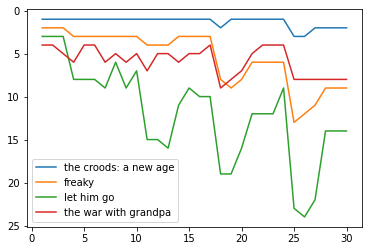

In [ ]:
fig, ax = plt.subplots(1, 1)
for movie in movies:
  ax.plot([i for i in range(1, 31)], dec_ranks[movie], label=movie)
ax.invert_yaxis()
ax.legend()
plt.show()

#### Next, let's visualize the change in rankings from day to day

In [ ]:
bo_dec_2020.dtypes

Rank            int64
Last rank       int64
Movie          object
Gross           int64
Change          int64
LW              int64
Theaters        int64
Per theater     int64
Total gross     int64
Days            int64
Distributor    object
New              bool
Estimated        bool
Dec             int64
dtype: object

In [ ]:
dec_ranks_change = {}
for movie in movies:
  dec_ranks_change[movie] = bo_dec_2020[bo_dec_2020['Movie'] == movie].sort_values(by=['Dec'])['Rank'].values - bo_dec_2020[bo_dec_2020['Movie'] == movie].sort_values(by=['Dec'])['Last rank'].values

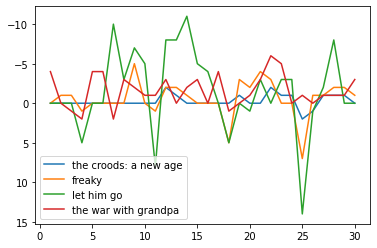

In [ ]:
fig, ax = plt.subplots(1, 1)
for movie in movies:
  ax.plot([i for i in range(1, 31)], dec_ranks_change[movie], label=movie)
ax.invert_yaxis()
ax.legend()
plt.show()

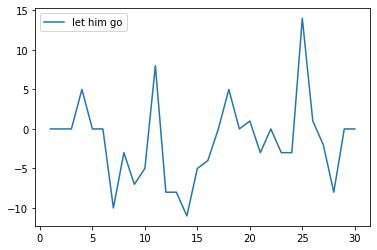

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot([i for i in range(1, 31)], dec_ranks_change['let him go'], label='let him go')
ax.legend()
plt.show()

#### Let's plot the daily revenue of each of these movies

In [ ]:
dec_rev_daily = {}
for movie in movies:
  dec_rev_daily[movie] = bo_dec_2020[bo_dec_2020['Movie'] == movie].sort_values(by=['Dec'])['Gross'].values

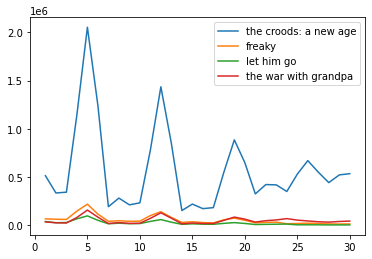

In [ ]:
fig, ax = plt.subplots(1, 1)
for movie in movies:
  ax.plot([i for i in range(1, 31)], dec_rev_daily[movie], label=movie)
ax.legend()
plt.show()

#### Let's check if the revenue earned by these movies are more during weekends

Here we will use `datetime` to get information on whether a given date is a weekday or a weekend.

link - https://pythontic.com/datetime/date/weekday

Monday - 0 --- Sunday - 6


In [ ]:
from datetime import datetime
weekends = []
for i in range(1, 31):
  d = datetime(2020, 12, i)
  if d.weekday() > 4:
    weekends.append(i)

In [ ]:
weekends

[5, 6, 12, 13, 19, 20, 26, 27]

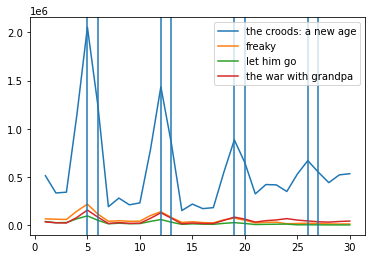

In [ ]:
fig, ax = plt.subplots(1, 1)
for movie in movies:
  ax.plot([i for i in range(1, 31)], dec_rev_daily[movie], label=movie)
ax.legend()
for i in weekends:
  ax.axvline(x=i)
plt.show()

Well yes, clearly movie revenue is higher on weekends. It also looks like revenue is high on fridays.

Let's add this information on whether that given day is a weekend/friday to the table


In [ ]:
weekend_friday = []
for i in range(1, 31):
  d = datetime(2020, 12, i)
  if d.weekday() > 3:
    weekend_friday.append(i)
weekend_friday

[4, 5, 6, 11, 12, 13, 18, 19, 20, 25, 26, 27]

In [ ]:
for idx, row in bo_dec_2020.iterrows():
  if row['Dec'] in weekend_friday:
    bo_dec_2020.loc[idx, 'isWeekend'] = 1
  else:
    bo_dec_2020.loc[idx, 'isWeekend'] = 0

In [ ]:
bo_dec_2020.head(100)

Rank  Last rank                                              Movie  \
0      1          1                              the croods: a new age   
1      2          2                                             freaky   
2      3          3                                         let him go   
3      4          8                               the war with grandpa   
4      5          6                                       honest thief   
..   ...        ...                                                ...   
95    10         10                            die hard2020 re-release   
96    11         13                                              tenet   
97    12         12  national lampoon's christmas vacation2020 re-r...   
98    13         13                   the polar express2020 re-release   
99    14         14                                 true to the game 2   

     Gross  Change    LW  Theaters  Per theater  Total gross  Days  \
0   512065      16   -75      2211          231     15226845     7   
1    64250      14   -56      2057           31      7163160    19   
2    36130      57   -51      1907           18      8766235    26   
3    32588     -60   -54      1500           21     17261085    73   
4    25693      24   -41       975           26     13587945    54   
..     ...     ...   ...       ...          ...          ...   ...   
95   83000      88     1      1172           70       145000     4   
96   76482    2210  3390       532          143     57552958   134   
97   71000      73   -19       420          169       332000    24   
98   71000      73     1         1            1       112000     2   
99   38097      47   -13       178          214      1181823    42   

                            Distributor    New  Estimated  Dec  isWeekend  
0                    universal pictures  False      False    1        0.0  
1                    universal pictures  False      False    1        0.0  
2                        focus features  False      False    1        0.0  
3                           101 studios  False      False    1        0.0  
4                  open road films (ii)  False      False    1        0.0  
..                                  ...    ...        ...  ...        ...  
95  walt disney studios motion pictures  False       True    5        1.0  
96                         warner bros.  False      False    5        1.0  
97                         warner bros.  False       True    5        1.0  
98                         warner bros.  False       True    5        1.0  
99             faith media distribution  False      False    5        1.0  

[100 rows x 15 columns]

#### Lets find the total revenue earned in december

In [ ]:
# Lets find the total revenue earned in december
sample = []
for key in dec_rev_daily:
  sample.append([key,np.sum(dec_rev_daily[key])])
pd.DataFrame(sample).sort_values(1, ascending=False)

0         1
0  the croods: a new age  17141505
1                 freaky   1595190
3   the war with grandpa   1424807
2             let him go    615885

#### Let's normalize it with the number of theaters, and compare revenue earned by each of the movies

In [ ]:
dec_rev_norm_daily = {}
for movie in movies:
  dec_rev_norm_daily[movie] = bo_dec_2020[bo_dec_2020['Movie'] == movie].sort_values(by=['Dec'])['Per theater'].values

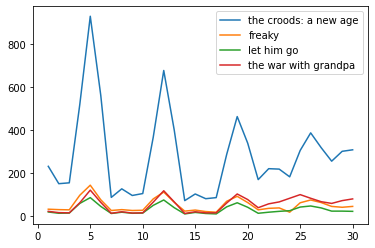

In [ ]:
fig, ax = plt.subplots(1, 1)
for movie in movies:
  ax.plot([i for i in range(1, 31)], dec_rev_norm_daily[movie], label=movie)
ax.legend()
plt.show()

In [ ]:
# Lets find the total revenue earned in december
sample = []
for key in dec_rev_norm_daily:
  sample.append([key,np.sum(dec_rev_norm_daily[key])])
pd.DataFrame(sample).sort_values(1, ascending=False)

0     1
0  the croods: a new age  8493
3   the war with grandpa  1590
1                 freaky  1509
2             let him go   895

#### Let's see if highly ranked movies correlate with higher gross earnings

In [ ]:
# Note here if rank is low (1 < 3) 1 is higher ranked than 3 although numerically less than 3
bo_dec_2020.corr()

Rank  Last rank     Gross    Change        LW  Theaters  \
Rank         1.000000   0.734914 -0.287304  0.053797  0.064157 -0.779419   
Last rank    0.734914   1.000000 -0.267040  0.096945  0.147365 -0.663940   
Gross       -0.287304  -0.267040  1.000000 -0.024795 -0.025492  0.423008   
Change       0.053797   0.096945 -0.024795  1.000000  0.256252 -0.063105   
LW           0.064157   0.147365 -0.025492  0.256252  1.000000 -0.091586   
Theaters    -0.779419  -0.663940  0.423008 -0.063105 -0.091586  1.000000   
Per theater -0.279205  -0.277361  0.964265 -0.019134 -0.009314  0.366518   
Total gross -0.186817  -0.016584  0.075647  0.083653  0.300824  0.148947   
Days         0.232968   0.316679 -0.142418  0.096395  0.289704 -0.266042   
New         -0.045798  -0.251666  0.183051 -0.029260 -0.030576  0.044466   
Estimated    0.059802  -0.090651 -0.054924 -0.066678 -0.089442 -0.158355   
Dec         -0.035375  -0.032327  0.121079  0.077997 -0.063440 -0.010369   
isWeekend    0.313412   0.021985  0.103707 -0.003290  0.043232 -0.088514   

             Per theater  Total gross      Days       New  Estimated  \
Rank           -0.279205    -0.186817  0.232968 -0.045798   0.059802   
Last rank      -0.277361    -0.016584  0.316679 -0.251666  -0.090651   
Gross           0.964265     0.075647 -0.142418  0.183051  -0.054924   
Change         -0.019134     0.083653  0.096395 -0.029260  -0.066678   
LW             -0.009314     0.300824  0.289704 -0.030576  -0.089442   
Theaters        0.366518     0.148947 -0.266042  0.044466  -0.158355   
Per theater     1.000000     0.046462 -0.160733  0.223117   0.028091   
Total gross     0.046462     1.000000  0.591494 -0.101406  -0.245502   
Days           -0.160733     0.591494  1.000000 -0.175054  -0.137014   
New             0.223117    -0.101406 -0.175054  1.000000   0.133371   
Estimated       0.028091    -0.245502 -0.137014  0.133371   1.000000   
Dec             0.155497     0.048100  0.063952  0.019870   0.059779   
isWeekend       0.185215    -0.114738 -0.060964  0.176054   0.420605   

                  Dec  isWeekend  
Rank        -0.035375   0.313412  
Last rank   -0.032327   0.021985  
Gross        0.121079   0.103707  
Change       0.077997  -0.003290  
LW          -0.063440   0.043232  
Theaters    -0.010369  -0.088514  
Per theater  0.155497   0.185215  
Total gross  0.048100  -0.114738  
Days         0.063952  -0.060964  
New          0.019870   0.176054  
Estimated    0.059779   0.420605  
Dec          1.000000   0.041055  
isWeekend    0.041055   1.000000

## Can we predict the rank of a movie given other attributes?

In [ ]:
dataset = bo_dec_2020[['Movie', 'Distributor', 'Gross', 'Change', 'LW', 'Theaters', 'Per theater', 'Total gross', 'Days', 'Rank', 'isWeekend']].copy()

In [ ]:
dataset

Movie           Distributor   Gross  Change   LW  \
0    the croods: a new age    universal pictures  512065      16  -75   
1                   freaky    universal pictures   64250      14  -56   
2               let him go        focus features   36130      57  -51   
3     the war with grandpa           101 studios   32588     -60  -54   
4             honest thief  open road films (ii)   25693      24  -41   
..                     ...                   ...     ...     ...  ...   
627                  tenet          warner bros.    5500      77  400   
628            all my life    universal pictures    3520      -8  -70   
629             let him go        focus features    1175      -4  -86   
630   the forgotten carols   purdie distribution     845    3923  704   
631             the rescue          cmc pictures     242    1000   34   

     Theaters  Per theater  Total gross  Days  Rank  isWeekend  
0        2211          231     15226845     7     1        0.0  
1        2057           31      7163160    19     2        0.0  
2        1907           18      8766235    26     3        0.0  
3        1500           21     17261085    73     4        0.0  
4         975           26     13587945    54     5        0.0  
..        ...          ...          ...   ...   ...        ...  
627       116           47     58038164   165    12        0.0  
628       133           26       896870    27    13        0.0  
629        54           21      9345990    55    14        0.0  
630        48           17       499689    55    15        0.0  
631         9           26        18172    17    16        0.0  

[632 rows x 11 columns]

**Decision Tree Classifier**

The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.

Refer to this for more details - https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.08-Random-Forests.ipynb

Simple example of classifying tomatoes as bad or good.
<img src="https://exploringaiblog.files.wordpress.com/2019/02/image.png" width="400px">

**How do we decide on the attribute to split?**

We use a matehmatical formulation of entropy.
**Entropy** is used for calculating the purity of a node. Lower the value of entropy, higher is the purity of the node. The entropy of a homogeneous node is zero.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/ns1.png">

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [ ]:
def get_features_labels(df):
  df = pd.get_dummies(df, columns=['Distributor'], drop_first=True)
  test = df.sample(frac=0.2, random_state=25)
  train = df.drop(test.index)
  
  y_test = test['Rank']
  x_test = test.drop(['Rank', 'Movie'], 1)

  y_train = train['Rank']
  x_train = train.drop(['Rank', 'Movie'], 1)
  return x_train, y_train, x_test, y_test


In [ ]:
x_train, y_train, x_test, y_test = get_features_labels(dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
x_train

Gross  Change   LW  Theaters  Per theater  Total gross  Days  isWeekend  \
0    512065      16  -75      2211          231     15226845     7        0.0   
2     36130      57  -51      1907           18      8766235    26        0.0   
3     32588     -60  -54      1500           21     17261085    73        0.0   
4     25693      24  -41       975           26     13587945    54        0.0   
5     24050     -71  -53      1029           23      8703590    45        0.0   
..      ...     ...  ...       ...          ...          ...   ...        ...   
627    5500      77  400       116           47     58038164   165        0.0   
628    3520      -8  -70       133           26       896870    27        0.0   
629    1175      -4  -86        54           21      9345990    55        0.0   
630     845    3923  704        48           17       499689    55        0.0   
631     242    1000   34         9           26        18172    17        0.0   

     Distributor_20th century studios  Distributor_artaffects entertainment  \
0                                   0                                     0   
2                                   0                                     0   
3                                   0                                     0   
4                                   0                                     0   
5                                   0                                     0   
..                                ...                                   ...   
627                                 0                                     0   
628                                 0                                     0   
629                                 0                                     0   
630                                 0                                     0   
631                                 0                                     0   

     ...  Distributor_purdie distribution  Distributor_relativity media  \
0    ...                                0                             0   
2    ...                                0                             0   
3    ...                                0                             0   
4    ...                                0                             0   
5    ...                                0                             0   
..   ...                              ...                           ...   
627  ...                                0                             0   
628  ...                                0                             0   
629  ...                                0                             0   
630  ...                                1                             0   
631  ...                                0                             0   

     Distributor_roadside attractions  Distributor_screen gems  \
0                                   0                        0   
2                                   0                        0   
3                                   0                        0   
4                                   0                        0   
5                                   0                        0   
..                                ...                      ...   
627                                 0                        0   
628                                 0                        0   
629                                 0                        0   
630                                 0                        0   
631                                 0                        0   

     Distributor_sony pictures classics  Distributor_tristar pictures  \
0                                     0                             0   
2                                     0                             0   
3                                     0                             0   
4                                     0                             0   
5                        

In [ ]:
x_train.columns

Index(['Gross', 'Change', 'LW', 'Theaters', 'Per theater', 'Total gross',
       'Days', 'isWeekend', 'Distributor_20th century studios',
       'Distributor_artaffects entertainment',
       'Distributor_bleecker street media', 'Distributor_cmc pictures',
       'Distributor_faith media distribution', 'Distributor_fathom events',
       'Distributor_focus features', 'Distributor_freestyle releasing',
       'Distributor_gathrfilms', 'Distributor_gravitas ventures',
       'Distributor_ifc films', 'Distributor_k street pictures',
       'Distributor_lionsgate', 'Distributor_madman entertainment',
       'Distributor_new line cinema', 'Distributor_open road films (ii)',
       'Distributor_paramount pictures', 'Distributor_purdie distribution',
       'Distributor_relativity media', 'Distributor_roadside attractions',
       'Distributor_screen gems', 'Distributor_sony pictures classics',
       'Distributor_tristar pictures', 'Distributor_universal pictures',
       'Distributor_walt d

In [ ]:
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

1.0
0.40476190476190477


In [ ]:
pd.DataFrame(np.array([x_train.columns, model.feature_importances_]).T).sort_values(by=1, ascending=False)

0         1
3                                          Theaters  0.186234
0                                             Gross  0.165674
5                                       Total gross  0.154612
2                                                LW  0.117061
1                                            Change  0.095152
6                                              Days  0.091222
4                                       Per theater  0.058238
7                                         isWeekend  0.045716
28                          Distributor_screen gems  0.011943
33                         Distributor_warner bros.  0.010861
31                   Distributor_universal pictures  0.008859
25                  Distributor_purdie distribution   0.00871
27                 Distributor_roadside attractions  0.008318
20                            Distributor_lionsgate  0.006823
23                 Distributor_open road films (ii)  0.006737
10                Distributor_bleecker street media  0.006187
32  Distributor_walt disney studios motion pictures   0.00528
18                            Distributor_ifc films  0.004125
21                 Distributor_madman entertainment   0.00275
22                      Distributor_new line cinema  0.002062
13                        Distributor_fathom events  0.002062
14                       Distributor_focus features  0.001375
30                     Distributor_tristar pictures       0.0
29               Distributor_sony pictures classics       0.0
26                     Distributor_relativity media       0.0
17                    Distributor_gravitas ventures       0.0
24                   Distributor_paramount pictures       0.0
19                    Distributor_k street pictures       0.0
16                           Distributor_gathrfilms       0.0
15                  Distributor_freestyle releasing       0.0
12             Distributor_faith media distribution       0.0
11                         Distributor_cmc pictures       0.0
9              Distributor_artaffects entertainment       0.0
8                  Distributor_20th century studios       0.0
34                          Distributor_zee studios       0.0

In [ ]:
len(x_train.columns)

35

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x_train.columns,class_names=[str(i) for i in range(1, 35)])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

### Let's try a more advanced version of decision trees called as Random Forests

Random Forests link - https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.08-Random-Forests.ipynb

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
rfc.score(x_test, y_test)

0.47619047619047616